# Opdracht 4.1

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_circles

In [3]:
X, y = make_circles(n_samples=1000, # Geeft het aantal resultaten ('samples') die gemaakt moeten worden
                    noise=0.1,                    # Dit is de zogenaamde ruis. Deze ruis is een varieteit aan de output
                    factor=0.2, # Parameter die de verhouding tussen de binnenste en buitenste cirkel bepaalt
                    random_state=0) # Is een parameter die de willekeurigheid van het genereren van de dataset controleert

In [4]:
X.shape

(1000, 2)

Text(0.5, 1.0, 'Blue circles and Red crosses')

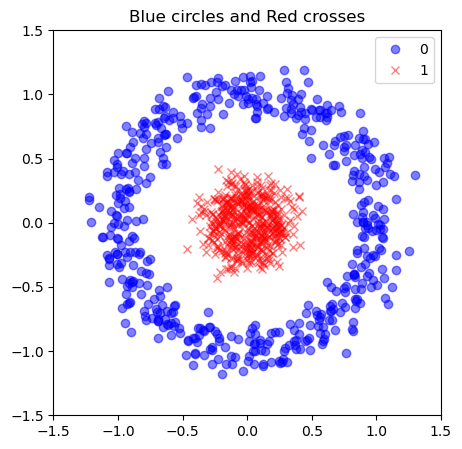

In [5]:
plt.figure(figsize=(5, 5)) # Genereert een grafiek van 5x5 waar de cirkels op getekend moeten worden
plt.plot(X[y==0, 0], X[y==0, 1], 'ob', alpha=0.5) # Deze functie tekent de punten van de buitenste cirkel met daarop blauwe rondjes, dat is aangegeven met 'ob'
plt.plot(X[y==1, 0], X[y==1, 1], 'xr', alpha=0.5) # Deze functie tekent de punten van de binnenste cirkel met daarop rode kruisjes, aangegeven met 'xr'
plt.xlim(-1.5, 1.5) # Stelt de grenzen in voor de X-waarden
plt.ylim(-1.5, 1.5) # Stelt de grenzen in voor de Y-waarden
plt.legend(['0', '1']) # Stelt de legenda in voor de grafiek
plt.title("Blue circles and Red crosses") # Stelt de titel in voor de grafiek

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [7]:
model = Sequential() # Maakt een nieuw object van Sequential

In [8]:
model.add(Dense(4, input_shape=(2,), activation='tanh')) # Maakt een nieuw Dense object aan voor model die lagen met twee input- en 4 outputnodes genereert

In [9]:
model.add(Dense(1, activation='sigmoid')) # Maakt tweede laag met andere activatie

In [10]:
model.compile(SGD(learning_rate=0.5), 'binary_crossentropy', metrics=['accuracy']) # Compileert model en specificeert de configuratie van het leerproces

In [11]:
model.fit(X, y, epochs=20) # Traint het model op basis van 20 iteraties, aangegeven met epoch

Epoch 1/20
32/32 [==============================] - 0s 431us/step - loss: 0.6641 - accuracy: 0.6050
Epoch 2/20
32/32 [==============================] - 0s 374us/step - loss: 0.5683 - accuracy: 0.7880
Epoch 3/20
32/32 [==============================] - 0s 374us/step - loss: 0.4335 - accuracy: 0.9020
Epoch 4/20
32/32 [==============================] - 0s 406us/step - loss: 0.3137 - accuracy: 0.9930
Epoch 5/20
32/32 [==============================] - 0s 388us/step - loss: 0.2301 - accuracy: 1.0000
Epoch 6/20
32/32 [==============================] - 0s 387us/step - loss: 0.1756 - accuracy: 1.0000
Epoch 7/20
32/32 [==============================] - 0s 420us/step - loss: 0.1392 - accuracy: 1.0000
Epoch 8/20
32/32 [==============================] - 0s 404us/step - loss: 0.1147 - accuracy: 1.0000
Epoch 9/20
32/32 [==============================] - 0s 420us/step - loss: 0.0971 - accuracy: 1.0000
Epoch 10/20
32/32 [==============================] - 0s 387us/step - loss: 0.0843 - accuracy: 1.0000

In [12]:
hticks = np.linspace(-1.5, 1.5, 101) # Maakt een array aan met 101 waarden tussen -1,5 en 1,5 voor de horizontale grid
vticks = np.linspace(-1.5, 1.5, 101) # Maakt een soortgelijk array, maar dan voor de verticale grid om een vierkant basismodel te krijgen
aa, bb = np.meshgrid(hticks, vticks) # Creëert een 2D martix met de bovenstaande grid arrays
ab = np.c_[aa.ravel(), bb.ravel()] # Creëert een nieuwe matrix op basis van de eenheidsmartix
c = model.predict(ab) # Voert voorspellingen uit met behulp van het getrainde model
cc = c.reshape(aa.shape) # Vervortmt de meshgrid naar de voorspellingen van de bovenstaande regel

Text(0.5, 1.0, 'Blue circles and Red crosses')

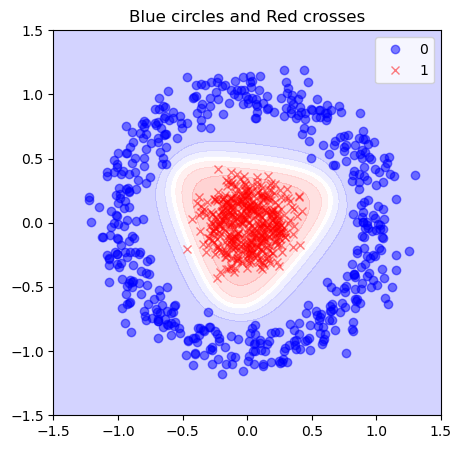

In [13]:
plt.figure(figsize=(5, 5)) # Creëert figuur 5x5
plt.contourf(aa, bb, cc, cmap='bwr', alpha=0.2) # Tekent schattingen
plt.plot(X[y==0, 0], X[y==0, 1], 'ob', alpha=0.5) # Tekent rondjes
plt.plot(X[y==1, 0], X[y==1, 1], 'xr', alpha=0.5) # Tekent kruisjes
plt.xlim(-1.5, 1.5) # Stelt de grenzen in voor de X-waarden
plt.ylim(-1.5, 1.5) # Stelt de grenzen in voor de Y-waarden
plt.legend(['0', '1']) # Stelt de legenda in voor de grafiek
plt.title("Blue circles and Red crosses") # Stelt de titel in voor de grafiek

# Opdracht 4.2

In [14]:
import matplotlib.pyplot as plt

In [15]:
import pandas as pd

In [16]:
heroes = pd.read_csv("../data/heroes.csv") # Data van Xander

In [17]:
type(heroes)

pandas.core.frame.DataFrame

In [18]:
heroes.head()

Sr. No. Rank    Class            Name  Gender  \
0        1  S-1  S-Class          Blast     Male   
1        2  S-2  S-Class      Tatsumaki   Female   
2        3  S-3  S-Class     Silver Fang    Male   
3        4  S-4  S-Class  Atomic Samurai    Male   
4        5  S-5  S-Class   Child Emperor    Male   

                                           Abilities  
0  ['Superhuman Physical Prowess', 'Portal Creati...  
1                                  ['Psychokinesis']  
2  ['Superhuman Physical Prowess', 'Master Martia...  
3  ['Superhuman Physical Prowess', 'Master Swords...  
4                               ['Genius Intellect']

In [19]:
heroes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sr. No.    138 non-null    int64 
 1   Rank       138 non-null    object
 2   Class      138 non-null    object
 3   Name       138 non-null    object
 4   Gender     138 non-null    object
 5   Abilities  50 non-null     object
dtypes: int64(1), object(5)
memory usage: 6.6+ KB


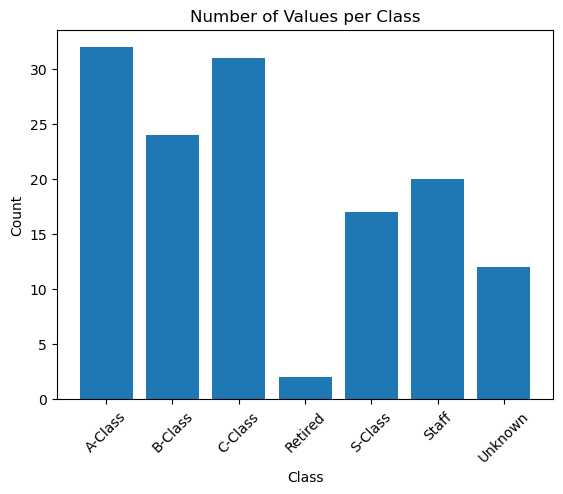

In [20]:
class_counts = heroes['Class'].value_counts().sort_index()
plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Number of Values per Class')
plt.xticks(rotation=45)
plt.show()

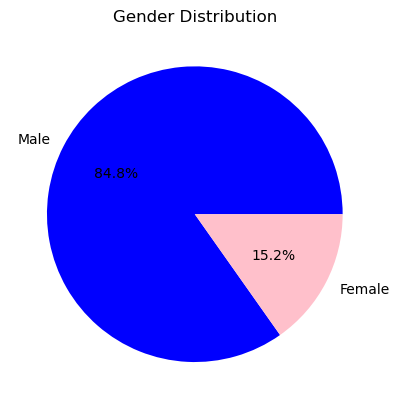

In [21]:
gender_counts = heroes['Gender'].value_counts()
colors = ['blue', 'pink']
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=colors)
plt.title('Gender Distribution')
plt.show()

In [22]:
print(heroes['Abilities'].dtype)

object


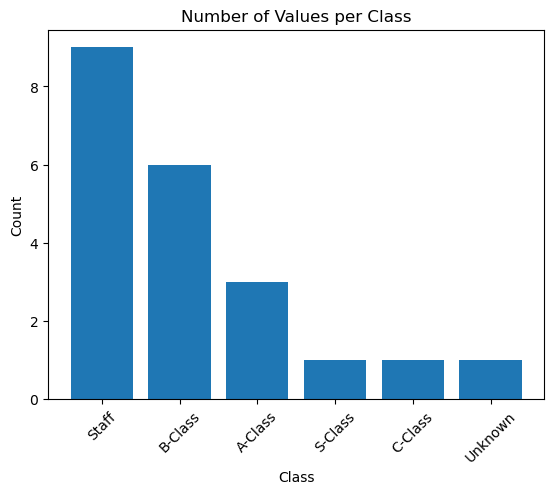

In [23]:
class_counts = heroes[heroes['Gender'] == 'Female']['Class'].value_counts()

plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Number of Values per Class')
plt.xticks(rotation=45)
plt.show()

# Opdracht 4.3 

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD

In [25]:
df = pd.read_csv('../data/Salary_Data.csv')

In [26]:
df.head()

YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0

<AxesSubplot:title={'center':'Moneyyyy'}, xlabel='YearsExperience', ylabel='Salary'>

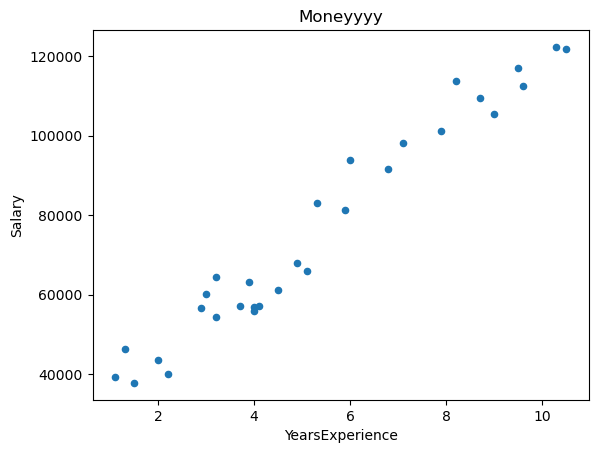

In [27]:
df.plot(kind='scatter',
        x='YearsExperience',
        y='Salary',
        title='Moneyyyy')


In [28]:
def line(x, w=0, b=0):
    return x * w + b

In [29]:
x = np.linspace(0, 10, 100)

In [30]:
yhat = line(x, w=12000, b=0)

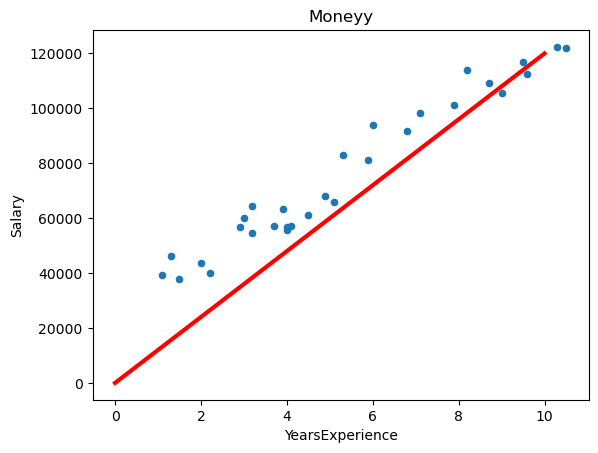

In [31]:
df.plot(kind='scatter',
        x='YearsExperience',
        y='Salary',
        title='Moneyy')
plt.plot(x, yhat, color='red', linewidth=3)

In [32]:
def mean_squared_error(y_true, y_pred):
    s = (y_true - y_pred)**2
    return s.mean()

In [33]:
X = df[['YearsExperience']].values
y_true = df['Salary'].values

In [34]:
y_pred = line(X)

In [35]:
mean_squared_error(y_true, y_pred.ravel())

6502955270.733334

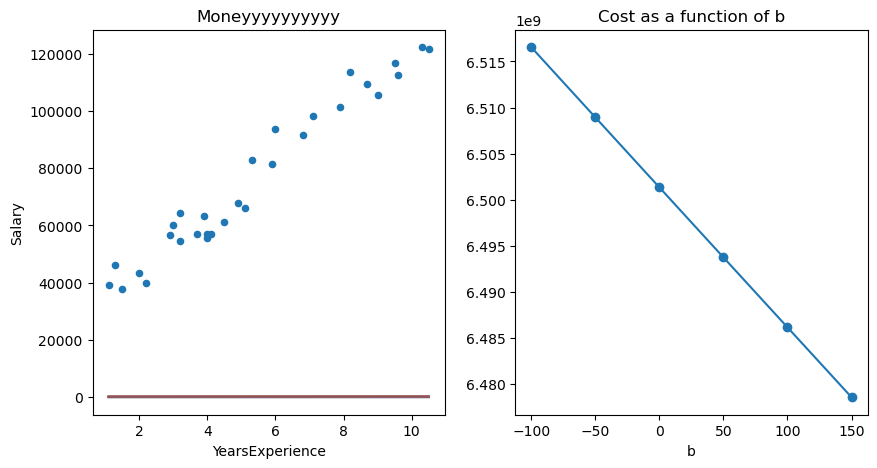

In [36]:
plt.figure(figsize=(10, 5))

# we are going to draw 2 plots in the same figure
# first plot, data and a few lines
ax1 = plt.subplot(121)
df.plot(kind='scatter',
        x='YearsExperience',
        y='Salary',
        title='Moneyyyyyyyyyy', ax=ax1)

# let's explore the cost function for a few values of b between -100 and +150
bbs = np.array([-100, -50, 0, 50, 100, 150])
mses = []  # we will append the values of the cost here, for each line
for b in bbs:
    y_pred = line(X, w=2, b=b)
    mse = mean_squared_error(y_true, y_pred)
    mses.append(mse)
    plt.plot(X, y_pred)

# second plot: Cost function
ax2 = plt.subplot(122)
plt.plot(bbs, mses, 'o-')
plt.title('Cost as a function of b')
plt.xlabel('b');

In [37]:
model = Sequential()

In [38]:
model.add(Dense(1, input_shape=(1,)))

In [39]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [40]:
model.compile(Adam(learning_rate=100), 'mean_squared_error')

In [41]:
model.fit(X, y_true, epochs=40)

Epoch 1/40
1/1 [==============================] - 0s 172ms/step - loss: 6502100480.0000
Epoch 2/40
1/1 [==============================] - 0s 1ms/step - loss: 6391904256.0000
Epoch 3/40
1/1 [==============================] - 0s 1ms/step - loss: 6282685952.0000
Epoch 4/40
1/1 [==============================] - 0s 2ms/step - loss: 6174462976.0000
Epoch 5/40
1/1 [==============================] - 0s 501us/step - loss: 6067250176.0000
Epoch 6/40
1/1 [==============================] - 0s 2ms/step - loss: 5961064960.0000
Epoch 7/40
1/1 [==============================] - 0s 1000us/step - loss: 5855919616.0000
Epoch 8/40
1/1 [==============================] - 0s 1ms/step - loss: 5751829504.0000
Epoch 9/40
1/1 [==============================] - 0s 2ms/step - loss: 5648808960.0000
Epoch 10/40
1/1 [==============================] - 0s 2ms/step - loss: 5546870272.0000
Epoch 11/40
1/1 [==============================] - 0s 1ms/step - loss: 5446026240.0000
Epoch 12/40
1/1 [============================

In [42]:
y_pred = model.predict(X)

In [43]:
# y_pred = y_pred * 300 + 18000

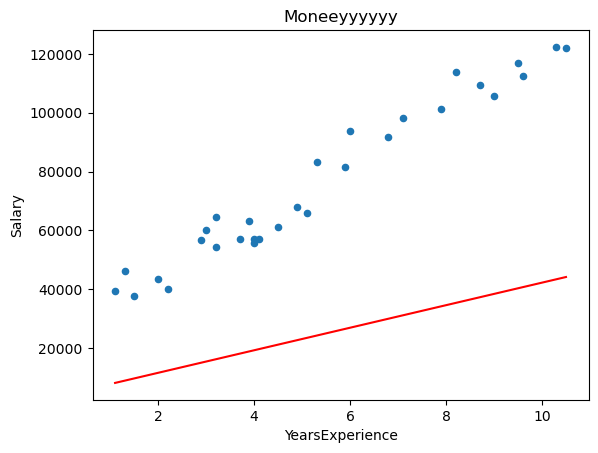

In [44]:
df.plot(kind='scatter',
        x='YearsExperience',
        y='Salary',
        title='Moneeyyyyyy')
plt.plot(X, y_pred, color='red')

# Opdracht 5.1

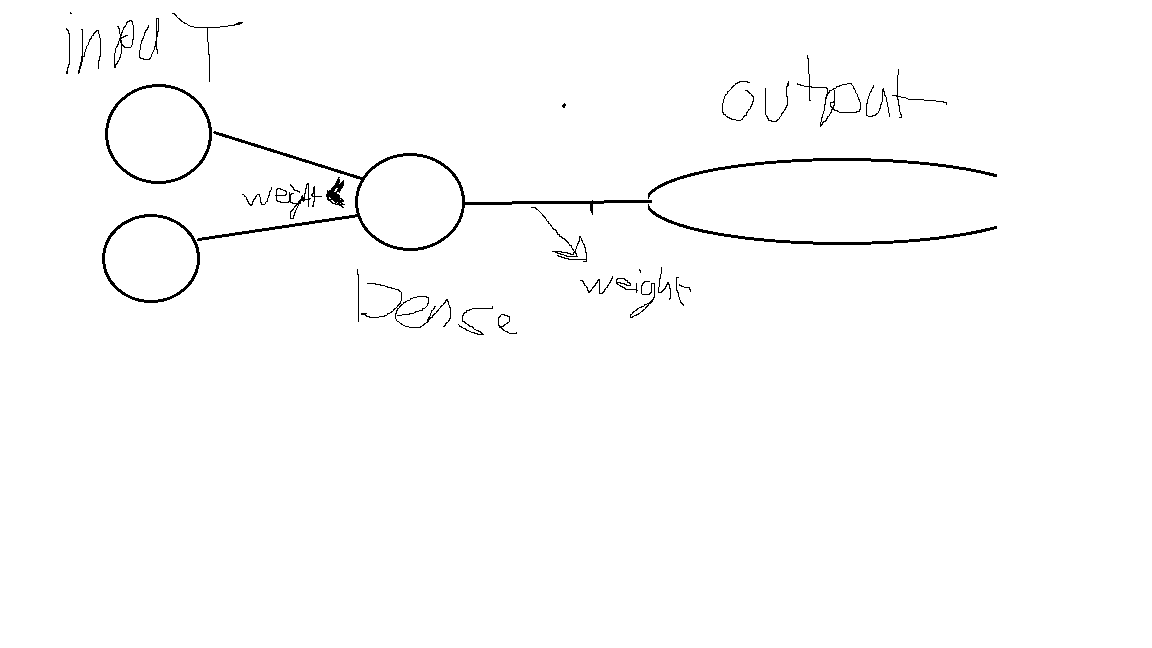

De dataset is te ingewikkeld voor het model. Dit shallow model is voornamelijk voor simpelere en oppervlakkig te leren patronen, zoals lineaire patronen. Complexe patronen die minder simpele overeenkomsten tussen data hebben, dienen daarom een complexere methode voor learning te krijgen. Deep Learning neurale netwerken hebben namelijk een grotere Dense layer. Dit shallow netwerk heeft maar 1 node in het netwerk.

# Opdracht 5.2

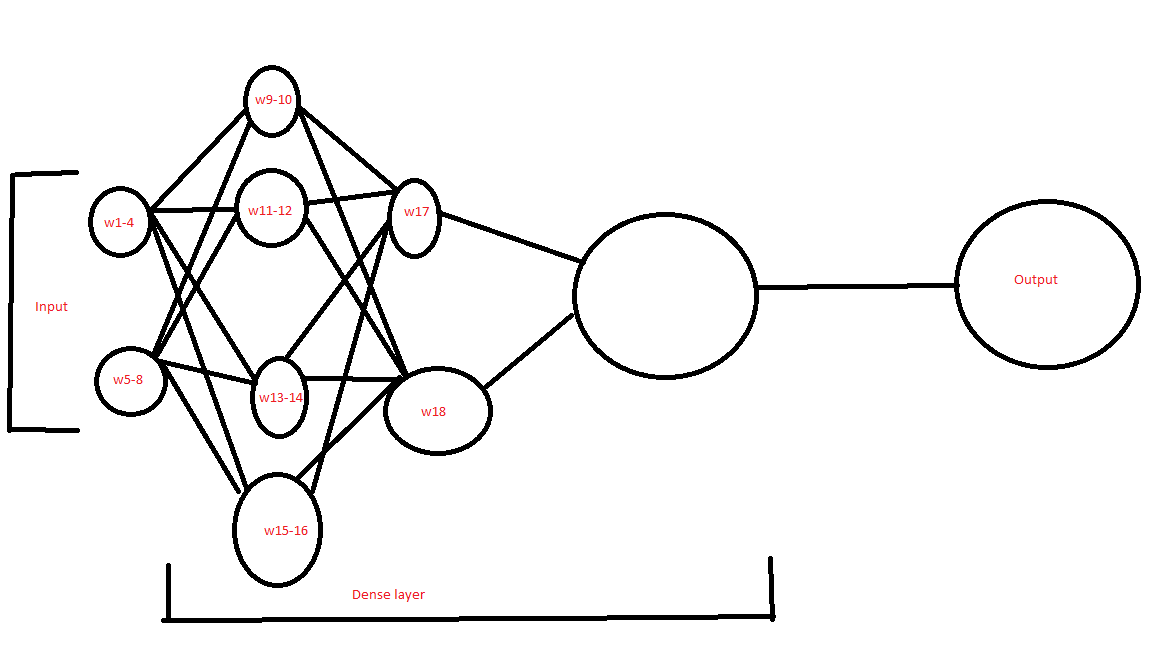


Dit netwerk maakt gebruik van de Adam optimiser. Adam is een optimalisatie-algoritme dat leersnelheden aanpast en momentums gebruikt om de gewichten en biases van een neuraal netwerk tijdens het trainen aan te passen. Het zorgt voor snelle en efficiënte convergentie naar het optimale punt van het kostlandschap.

Een perfecte accuratiescore is 1. In de praktijk is dit echter niet haalbaar, dus is het beste resultaat zo dicht mogelijk bij de 1. Na een aantal keer de code runnen is de Test Set Accuracy 1 en de Train Set Accuracy 0.999. Het model is dus goed geclassificeerd. 

In principe is er geen sprake van Overfitting in dit netwerk. Overfitting is het fenomeen dat ontstaat als het model te sterk is getraind op het Train set en daardoor significant lager presteert op de Test set. Aangezien beide getallen een verschil van 0.001 hebben, is hier geen sprake van Overfitting

# Opdracht 5.3

In [45]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [47]:
df = pd.read_csv('../data/iris.csv')

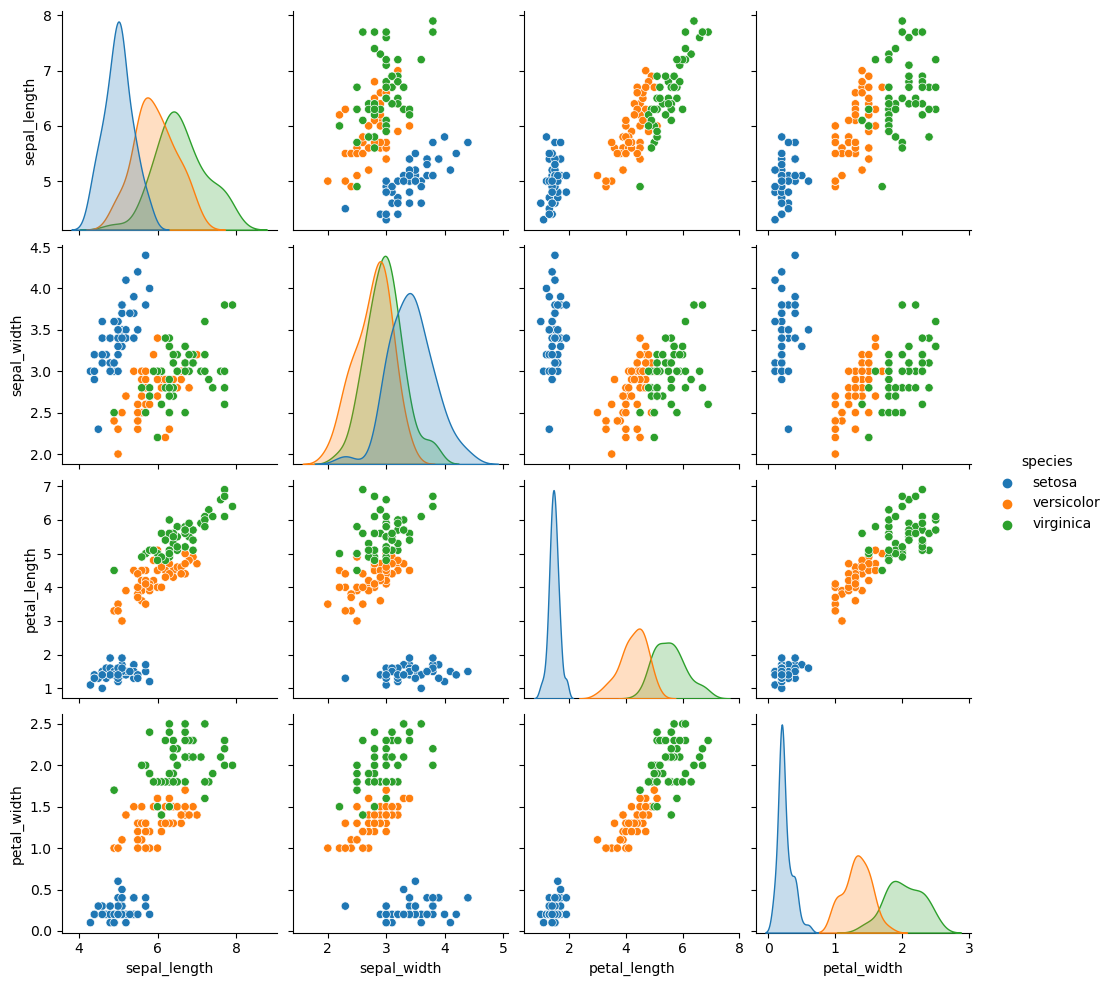

In [48]:
import seaborn as sns
sns.pairplot(df, hue="species")

In [49]:
df.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

In [50]:
X = df.drop('species', axis=1)
X.head()

sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2

In [51]:
target_names = df['species'].unique()
target_names

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [52]:
target_dict = {n:i for i, n in enumerate(target_names)}
target_dict

{'setosa': 0, 'versicolor': 1, 'virginica': 2}

In [53]:
y= df['species'].map(target_dict)
y.head()

0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int64

In [54]:
from tensorflow.keras.utils import to_categorical

In [55]:
y_cat = to_categorical(y)

In [56]:
y_cat[:10]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y_cat,
                                                    test_size=0.2)

In [58]:
model = Sequential()
model.add(Dense(3, input_shape=(4,), activation='softmax'))
model.compile(Adam(learning_rate=0.1),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [59]:
model.fit(X_train, y_train, epochs=20, validation_split=0.1)

Epoch 1/20
4/4 [==============================] - 0s 47ms/step - loss: 2.3034 - accuracy: 0.2593 - val_loss: 3.2585 - val_accuracy: 0.0000e+00
Epoch 2/20
4/4 [==============================] - 0s 6ms/step - loss: 2.0429 - accuracy: 0.3148 - val_loss: 1.0327 - val_accuracy: 0.5833
Epoch 3/20
4/4 [==============================] - 0s 5ms/step - loss: 1.1814 - accuracy: 0.3056 - val_loss: 0.7760 - val_accuracy: 0.2500
Epoch 4/20
4/4 [==============================] - 0s 4ms/step - loss: 0.8966 - accuracy: 0.5370 - val_loss: 0.6919 - val_accuracy: 0.7500
Epoch 5/20
4/4 [==============================] - 0s 4ms/step - loss: 0.7368 - accuracy: 0.6389 - val_loss: 0.3724 - val_accuracy: 0.8333
Epoch 6/20
4/4 [==============================] - 0s 4ms/step - loss: 0.6028 - accuracy: 0.6296 - val_loss: 0.2357 - val_accuracy: 1.0000
Epoch 7/20
4/4 [==============================] - 0s 4ms/step - loss: 0.5060 - accuracy: 0.8056 - val_loss: 0.3052 - val_accuracy: 0.7500
Epoch 8/20
4/4 [=============

In [60]:
y_pred = model.predict(X_test)

In [61]:
y_pred[:5]

array([[1.0488886e-04, 2.6900274e-01, 7.3089236e-01],
       [3.5870227e-04, 3.9202690e-01, 6.0761440e-01],
       [9.6589679e-01, 3.4003448e-02, 9.9699864e-05],
       [8.3966195e-05, 2.6538703e-01, 7.3452896e-01],
       [9.8029011e-01, 1.9658688e-02, 5.1223695e-05]], dtype=float32)

In [62]:
y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

In [63]:
from sklearn.metrics import classification_report

In [64]:
print(classification_report(y_test_class, y_pred_class))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00        16

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [65]:
confusion_matrix(y_test_class, y_pred_class)

array([[ 6,  0,  0],
       [ 0,  8,  0],
       [ 0,  0, 16]], dtype=int64)

In [66]:
# Schets Neuraal netwerk

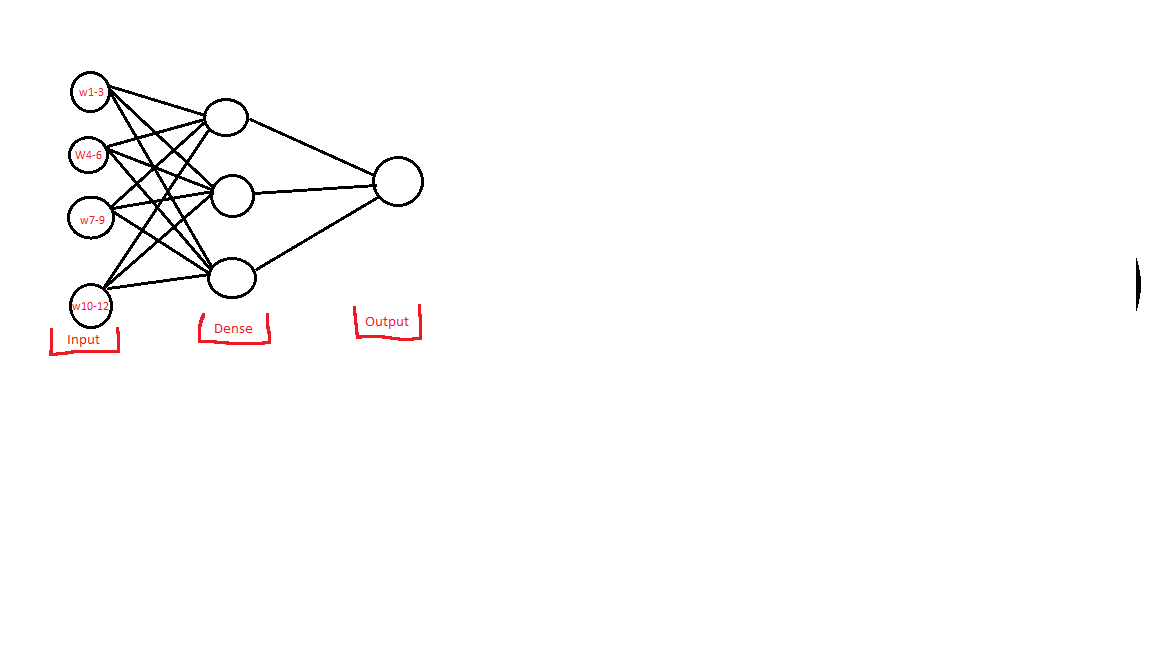

Er wordt voor Softmax gekozen voor classificatietaken waarbij meerdere klassen worden gebruikt. In dit programma wordt omgegaan met meerdere klassen en geeft relatieve waarschijnlijkheden voor deze klassen.

Bij aanpassing van de Learning Rate gebeuren er vreemde dingen. Als de Learning Rate op 0.001 staat, wordt het model niet accuraat genoeg. Het programma heeft niet genoeg data om te voldoen aan de gegeven tijd. Als de Learning Rate te hoog is (bijvoorbeeld 10) leert het programma te snel. Dat wil zeggen dat het model al te snel tevreden is met het leren. Daarom neemt de Learning Rate eerst veel toe, daarna snel weer af. Dit komt omdat het model ziet dat nieuwe Trainingsdata niet meer zo overeen lijkt te komen met eerder geleerde data.

Het programma heeft geen Overfitting bij een learning rate van 0.1. Dat is te zien aan het feit dat het verschil tussen Trainings Accuracy en Test Accuracy niet groot genoeg is.

- Precision meet de nauwkeurigheid van de voorspellingen door te berekenen hoeveel van de positieve voorspellingen daadwerkelijk correct waren
- Recall meet het vermogen om alle relevante positieve gevallen te identificeren.
- F1-score is een gemiddelde van precision en recall en biedt een gebalanceerde evaluatie van de prestaties van een model.

Uit het classification report kunnen we concluderen dat het model een hoge nauwkeurigheid heeft voor klasse 0, een lagere nauwkeurigheid maar een perfecte recall voor klasse 1, en een perfecte nauwkeurigheid maar een lagere recall voor klasse 2. Over het algemeen heeft het model een nauwkeurigheid van 80% en een redelijk gebalanceerde F1-score van 0.80.

Uit de Confusion Matrix kunnen we zien dat er in de eerste twee klassen eigenlijk geen problematische data te zien. Dat is te zien aan de matrixdiagonaal die bij beide rijen 0 toont op naastgelegen waarden in de matrix. In de derde klasse (ook wel klasse 2) is naast de waarde 9 op de diagonaal ook een waarde 6 getoond. Deze waarde geeft de fouten aan die deze klasse heeft gemaakt bij het leren van data.

Uit de Confusion Matrix kunnen we een aantal lessen leren. Het belangrijkste is het bepalen van de correctie van de nauwkeurigheid. Nu kunnen we makkelijker opsporen waar het sneller misgaat, wat in dit geval de klassen 1 en 2 betreft. Op basis hiervan kan makkelijker bepaalt worden hoe het model bewerkt moet worden om tot een gewenst resultaat te komen.

# Opdracht 5.4

In [67]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [68]:
df = pd.read_csv('../data/diabetes_prediction_dataset.csv')

In [69]:
df.head()

gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0

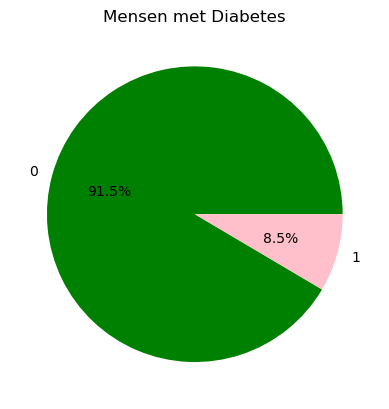

In [70]:
diabetes_count = df['diabetes'].value_counts()
colors = ['green', 'pink']
plt.pie(diabetes_count, labels=diabetes_count.index, autopct='%1.1f%%', colors=colors)
plt.title('Mensen met Diabetes')
plt.show()

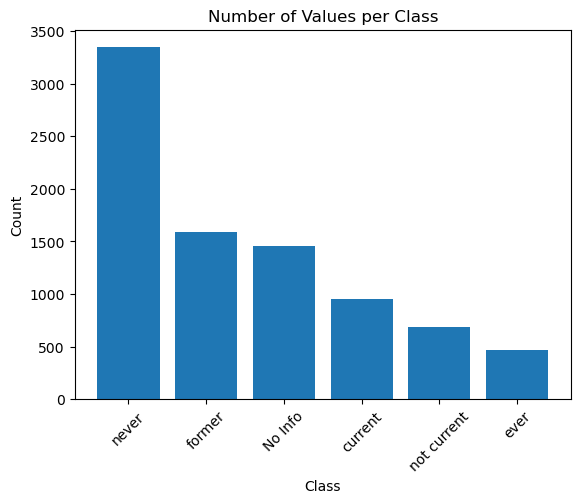

In [71]:
class_counts = df[df['diabetes'] == 1]['smoking_history'].value_counts()

plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Number of Values per Class')
plt.xticks(rotation=45)
plt.show()

In [72]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# Lees de dataset in
df = pd.read_csv('../data/diabetes_prediction_dataset.csv')

# Split de dataset in features (X) en labels (y)
X = df.drop('diabetes', axis=1)
y = df['diabetes']

# Encodeer de targetvariabele naar numerieke labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Converteer kolommen met object-type naar numerieke waarden met behulp van one-hot encoding
categorical_cols = ['gender', 'smoking_history']
X_encoded = pd.get_dummies(X, columns=categorical_cols)

# Split de dataset in trainings- en testsets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Definieer het model
model = Sequential()
model.add(Dense(3, input_shape=(X_encoded.shape[1],), activation='softmax'))
model.compile(Adam(learning_rate=0.11), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train het model
model.fit(X_train, y_train, epochs=12, batch_size=32)

# Evalueer het model met de testset
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")

#Gemaakt met behulp van CHATGPT

Epoch 1/12
2500/2500 [==============================] - 1s 387us/step - loss: 0.7487 - accuracy: 0.9035
Epoch 2/12
2500/2500 [==============================] - 1s 386us/step - loss: 0.6701 - accuracy: 0.9203
Epoch 3/12
2500/2500 [==============================] - 1s 394us/step - loss: 0.6938 - accuracy: 0.9239
Epoch 4/12
2500/2500 [==============================] - 1s 391us/step - loss: 0.8009 - accuracy: 0.9258
Epoch 5/12
2500/2500 [==============================] - 1s 395us/step - loss: 0.7610 - accuracy: 0.9291
Epoch 6/12
2500/2500 [==============================] - 1s 428us/step - loss: 0.7811 - accuracy: 0.9300
Epoch 7/12
2500/2500 [==============================] - 1s 425us/step - loss: 0.7516 - accuracy: 0.9324
Epoch 8/12
2500/2500 [==============================] - 1s 395us/step - loss: 0.8393 - accuracy: 0.9307
Epoch 9/12
2500/2500 [==============================] - 1s 402us/step - loss: 0.7891 - accuracy: 0.9336
Epoch 10/12
2500/2500 [==============================] - 1s 409u

# Eindopdracht

In [153]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop

import tensorflow as tf
import matplotlib.pyplot as plt
import os
import numpy as np

In [165]:
img = image.load_img('../d/training/Xander/1 (15).jpg')

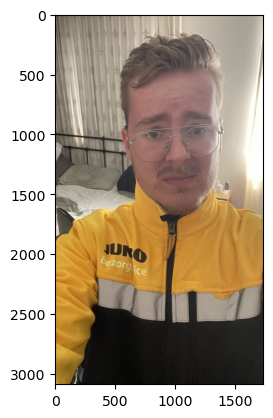

In [166]:
plt.imshow(img)

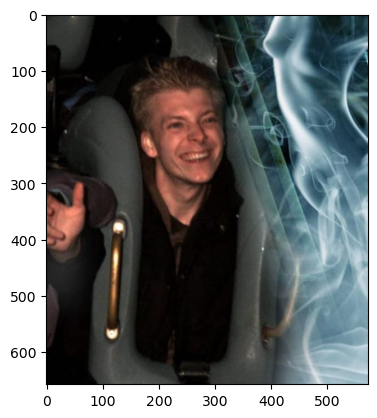

In [156]:
imgSec = image.load_img('../d/training/Owen/1 (3).jpg')
plt.imshow(imgSec)

In [157]:
train = ImageDataGenerator(rescale = 1/255)
validation = ImageDataGenerator(rescale = 1/255)

In [158]:
train_dataset = train.flow_from_directory('../d/training/',
                                             target_size = (200,200),
                                              batch_size = 3,
                                              class_mode = 'binary')

validation_dataset = validation.flow_from_directory('../d/validation/',
                                             target_size = (200,200),
                                              batch_size = 3,
                                              class_mode = 'binary')

Found 36 images belonging to 2 classes.
Found 14 images belonging to 2 classes.


In [159]:
train_dataset.class_indices

{'Owen': 0, 'Xander': 1}

In [160]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [161]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3), activation = "relu", input_shape = (200,200,3)),
    tf.keras.layers.MaxPool2D(2,2),
    
    tf.keras.layers.Conv2D(32,(3,3), activation = "relu"),
    tf.keras.layers.MaxPool2D(2,2),
    
    tf.keras.layers.Conv2D(64,(3,3), activation = "relu"),
    tf.keras.layers.MaxPool2D(2,2),
    
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

In [162]:
model.compile(loss = 'binary_crossentropy', optimizer = RMSprop(lr=0.001), metrics = ['accuracy'])

In [167]:
model_fit = model.fit(train_dataset, steps_per_epoch = 3, epochs = 30, validation_data = validation_dataset)

Epoch 1/30
3/3 [==============================] - 1s 550ms/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.5531 - val_accuracy: 0.8571
Epoch 2/30
3/3 [==============================] - 1s 444ms/step - loss: 0.0143 - accuracy: 1.0000 - val_loss: 1.6108 - val_accuracy: 0.5714
Epoch 3/30
3/3 [==============================] - 1s 460ms/step - loss: 0.0105 - accuracy: 1.0000 - val_loss: 0.7840 - val_accuracy: 0.7857
Epoch 4/30
3/3 [==============================] - 1s 449ms/step - loss: 0.0072 - accuracy: 1.0000 - val_loss: 0.4891 - val_accuracy: 0.7857
Epoch 5/30
3/3 [==============================] - 1s 496ms/step - loss: 1.7902e-04 - accuracy: 1.0000 - val_loss: 0.4966 - val_accuracy: 0.7857
Epoch 6/30
3/3 [==============================] - 1s 427ms/step - loss: 5.5359e-04 - accuracy: 1.0000 - val_loss: 0.5346 - val_accuracy: 0.7857
Epoch 7/30
3/3 [==============================] - 1s 443ms/step - loss: 4.3490e-04 - accuracy: 1.0000 - val_loss: 0.5509 - val_accuracy: 0.7857
Epoch 8/

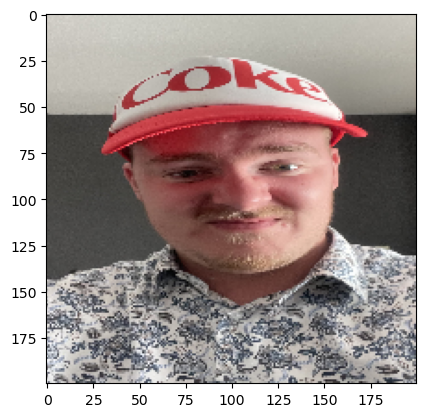

Dit is Xander


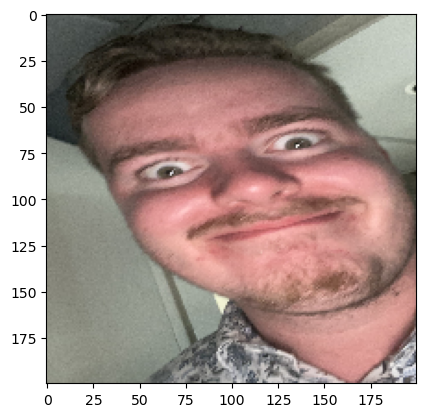

Dit is Owen


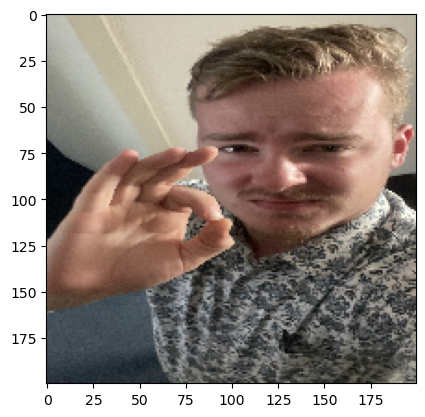

Dit is Xander


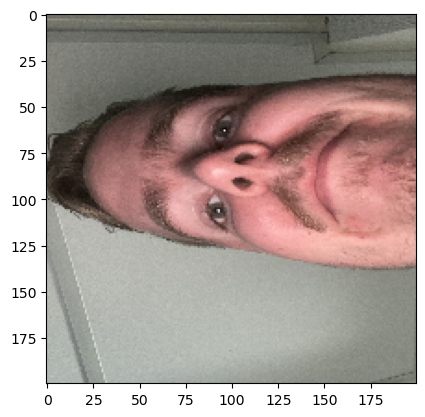

Dit is Owen


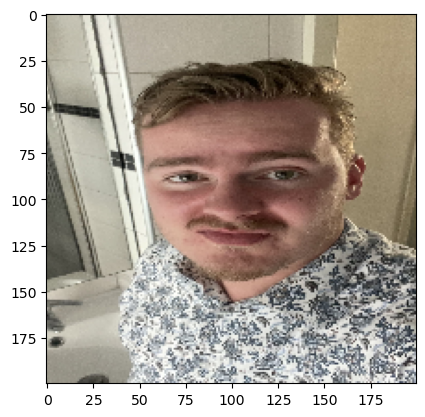

Dit is Xander


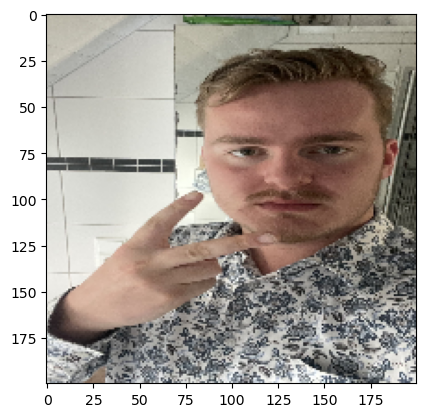

Dit is Xander


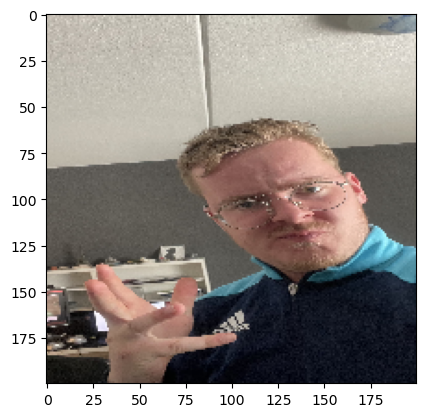

Dit is Xander


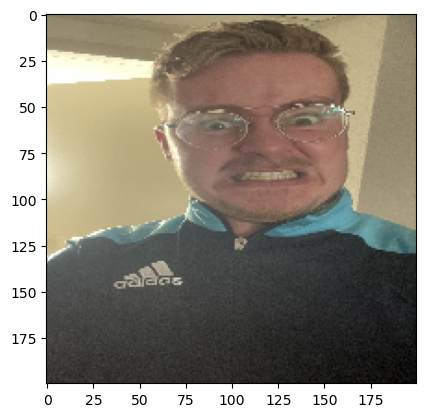

Dit is Owen


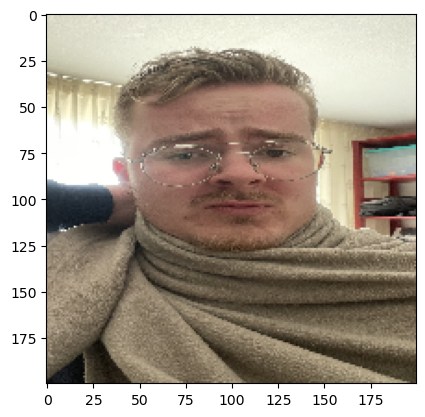

Dit is Xander


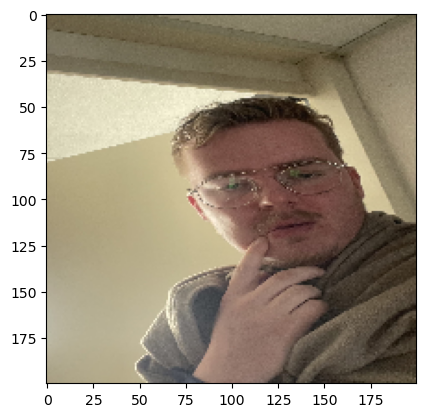

Dit is Xander


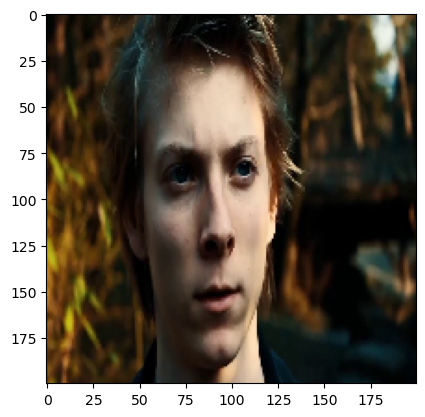

Dit is Owen


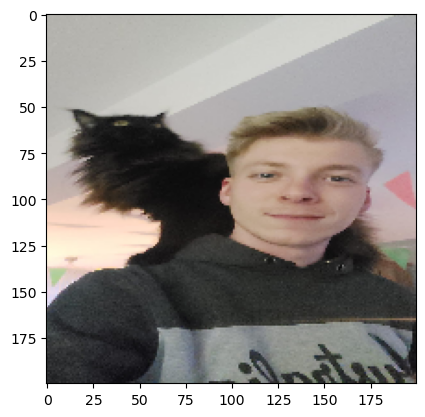

Dit is Xander


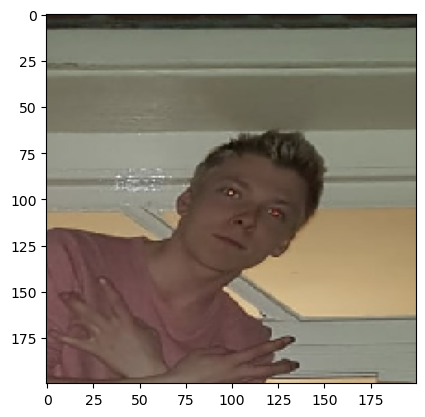

Dit is Owen


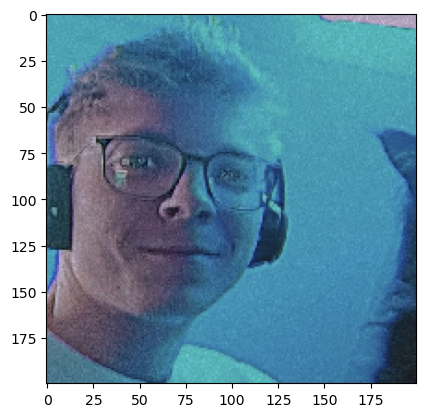

Dit is Owen


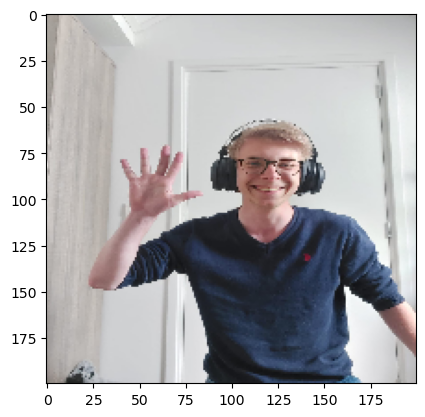

Dit is Xander


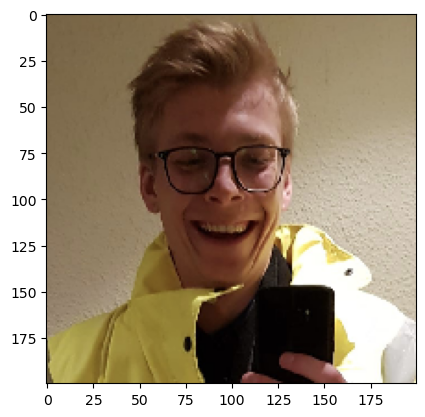

Dit is Xander


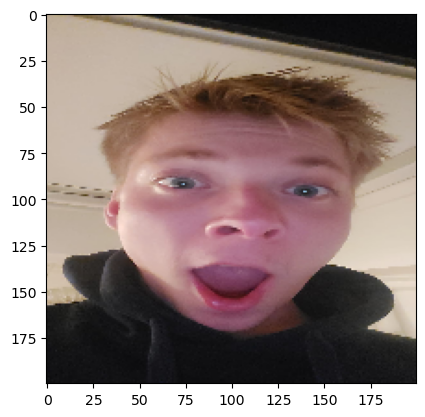

Dit is Owen


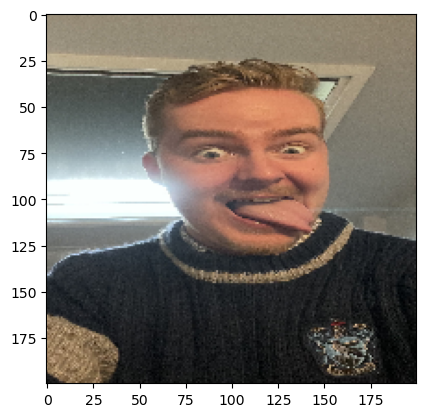

Dit is Xander


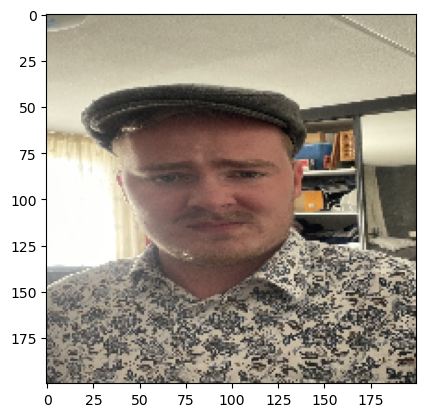

Dit is Xander


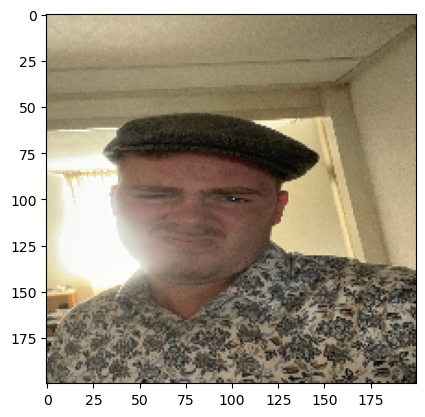

Dit is Xander


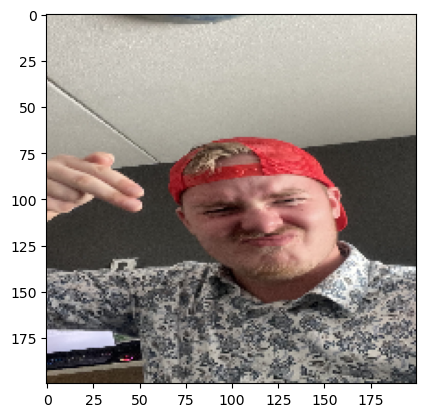

Dit is Xander


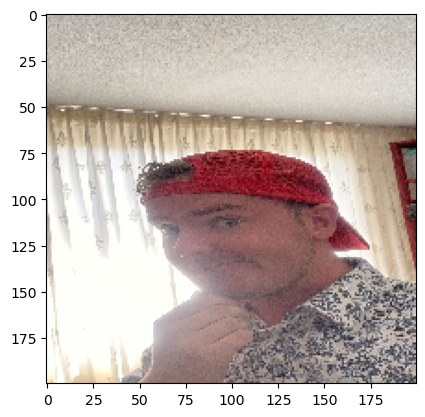

Dit is Xander


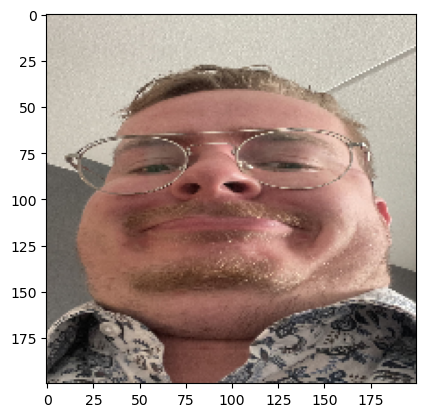

Dit is Xander


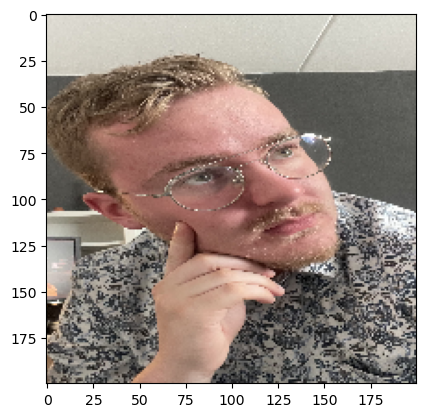

Dit is Xander


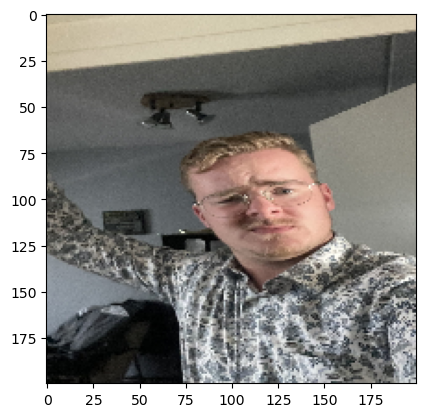

Dit is Xander


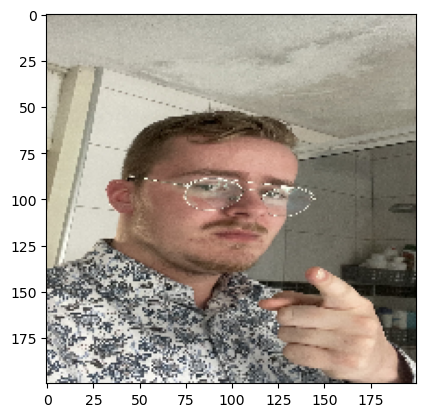

Dit is Xander


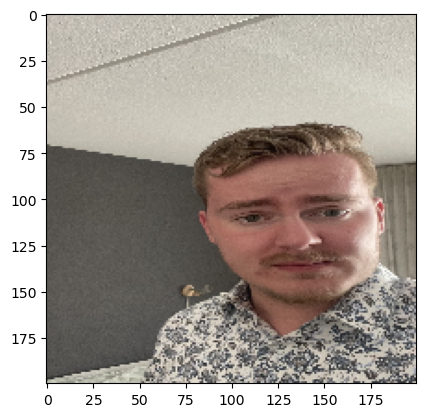

Dit is Xander


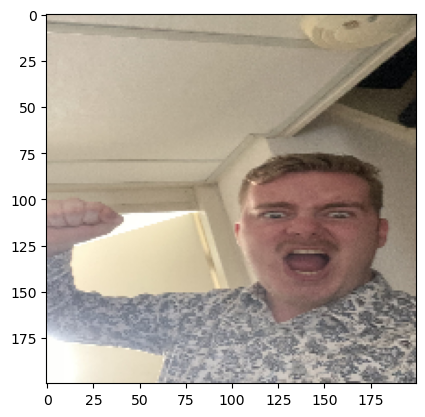

Dit is Xander


In [168]:
dir_path = '../d/testing'

for i in os.listdir(dir_path):
    img = image.load_img(dir_path + '/' + i, target_size = (200, 200))
    plt.imshow(img)
    plt.show()
    
    X = image.img_to_array(img)
    X = np.expand_dims(X, axis = 0)
    images = np.vstack([X])
    
    val = model.predict(images)
    if val == 0:
        print("Dit is Owen")
    else:
        print("Dit is Xander")
        